=> Data Understanding:

=> Importation des Packages nécessaires

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn import model_selection
import warnings
from sklearn.exceptions import ConvergenceWarning
from pandas.plotting import scatter_matrix

Chargement des données population pour le choix géographique

In [167]:
data_population_region = pd.read_csv('Datasets/fr_population.region.departement.csv')
df_data_population_region = pd.DataFrame(data_population_region)
print(df_data_population_region.columns)
df_data_population_region.head(10)

Index(['région', '1er janvier 2024 (p)', 'Recensement 1990',
       'Recensement 1999', '1er janvier 2008', 'Column1'],
      dtype='object')


,région,1er janvier 2024 (p),Recensement 1990,Recensement 1999,1er janvier 2008,Column1
0,Île-de-France,"12,419,961","10,644,665","10,946,012","11,659,260",NaN
1,Auvergne-Rhône-Alpes,"8,235,923","6,668,168","6,949,608","7,459,092",NaN
2,Nouvelle Aquitaine,"6,154,772","5,114,287","5,257,954","5,671,076",NaN
3,Occitanie,"6,154,729","4,546,249","4,842,680","5,419,946",NaN
4,Hauts-de-France,"5,983,823","5,770,671","5,855,448","5,931,091",NaN
5,Grand Est,"5,568,711","5,274,064","5,387,509","5,521,452",NaN
6,Provence-Alpes-Côte d'Azur,"5,198,011","4,257,244","4,502,385","4,882,913",NaN
7,Pays de la Loire,"3,926,389","3,055,197","3,219,960","3,510,170",NaN
8,Bretagne,"3,453,023","2,794,317","2,904,075","3,149,701",NaN
9,Normandie,"3,327,077","3,126,859","3,202,449","3,293,092",NaN


In [168]:
df_data_population_region=df_data_population_region.dropna(axis=1)

In [169]:
df_data_population_region.head(10)

,région,1er janvier 2024 (p),Recensement 1990,Recensement 1999,1er janvier 2008
0,Île-de-France,"12,419,961","10,644,665","10,946,012","11,659,260"
1,Auvergne-Rhône-Alpes,"8,235,923","6,668,168","6,949,608","7,459,092"
2,Nouvelle Aquitaine,"6,154,772","5,114,287","5,257,954","5,671,076"
3,Occitanie,"6,154,729","4,546,249","4,842,680","5,419,946"
4,Hauts-de-France,"5,983,823","5,770,671","5,855,448","5,931,091"
5,Grand Est,"5,568,711","5,274,064","5,387,509","5,521,452"
6,Provence-Alpes-Côte d'Azur,"5,198,011","4,257,244","4,502,385","4,882,913"
7,Pays de la Loire,"3,926,389","3,055,197","3,219,960","3,510,170"
8,Bretagne,"3,453,023","2,794,317","2,904,075","3,149,701"
9,Normandie,"3,327,077","3,126,859","3,202,449","3,293,092"


C:\Users\KAOUTAR\AppData\Local\Temp\ipykernel_17380\2963113274.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2024['1er janvier 2024 (p)'] = data_2024['1er janvier 2024 (p)'].str.replace(',', '').astype(int)


0     12419961
1      8235923
2      6154772
3      6154729
4      5983823
5      5568711
6      5198011
7      3926389
8      3453023
9      3327077
10     2791719
11     2573295
12      355528
Name: 1er janvier 2024 (p), dtype: int32


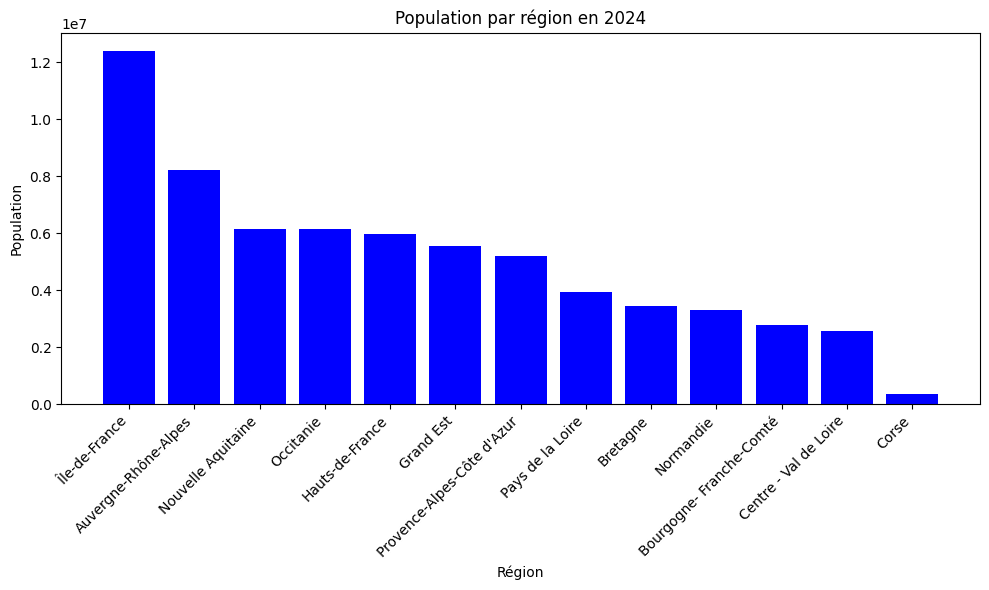

In [170]:
# Charger le fichier CSV dans un DataFrame
data_population_region = df_data_population_region

# Sélectionner uniquement les colonnes 'région' et '1er janvier 2024 (p)'
data_2024 = data_population_region[['région', '1er janvier 2024 (p)']]

# Remplacer les virgules dans les valeurs numériques et convertir en type int
data_2024['1er janvier 2024 (p)'] = data_2024['1er janvier 2024 (p)'].str.replace(',', '').astype(int)
print(data_2024['1er janvier 2024 (p)'])
# Créer le graphique
plt.figure(figsize=(10, 6))
plt.bar(data_2024['région'], data_2024['1er janvier 2024 (p)'], color='blue')

plt.title("Population par région en 2024")
plt.xlabel("Région")
plt.ylabel("Population")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Après avoir visualisé les données, il est clair que la région Auvergne-Rhône-Alpes se distingue comme la deuxième région la plus peuplée en France, juste après l'Île-de-France. Cette constatation est cruciale pour notre programme de prédiction des élections en France. En effet, choisir cette région comme échantillon significatif pour notre programme est une décision stratégique et justifiée. En choisissant la région Auvergne-Rhône-Alpes comme échantillon pour notre programme de prédiction des élections, nous nous appuyons sur une base solide et représentative qui nous permettra de tirer des conclusions précieuses et pertinentes pour l'ensemble de la France.

Chargement des données

In [171]:
#chargement des données des élections des années précédentes 
data_elections = pd.read_excel('Datasets\donnees_elections_annees.xlsx')

In [172]:
data_elections.head(10)

,id_election,Code,Libellé du département,Annee,nombre_inscrits,nombre_abstentions,nombre_blancs_nuls,votants
0,1,1,AIN,2007,372951,53428,13670,319523
1,2,3,ALLIER,2007,259503,38826,10809,220677
2,3,7,ARDECHE,2007,235544,31610,9399,203934
3,4,15,CANTAL,2007,123322,16704,4429,106618
4,5,26,DROME,2007,338120,47344,12910,290776
5,6,43,HAUTE LOIRE,2007,173262,23377,7714,149885
6,7,74,HAUTE SAVOIE,2007,472858,72615,17195,400243
7,8,38,ISERE,2007,784163,113070,27707,671093
8,9,42,LOIRE,2007,505913,79025,19819,426888
9,10,63,PUY DE DOME,2007,443310,58836,17700,384474


<Figure size 1000x600 with 0 Axes>

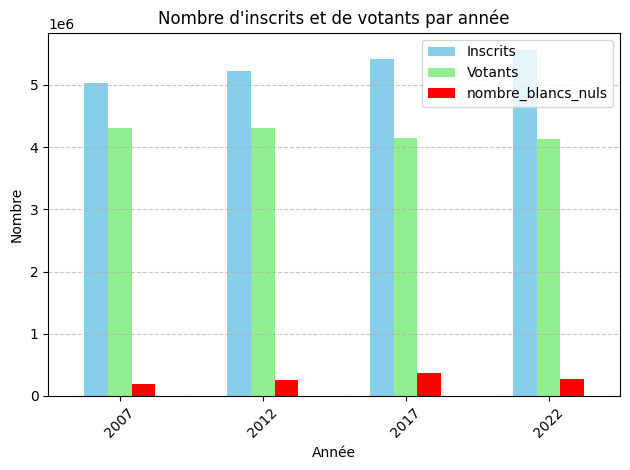

In [190]:
import matplotlib.pyplot as plt

# Groupement des données par année et calcul de la somme des inscrits et des votants par année
donnees_par_annee = data_elections.groupby('Annee')[['nombre_inscrits', 'votants','nombre_blancs_nuls']].sum()

# Création du graphique à barres groupées
plt.figure(figsize=(10, 6))
donnees_par_annee.plot(kind='bar', color=['skyblue', 'lightgreen', 'red'])
plt.title('Nombre d\'inscrits et de votants par année')
plt.xlabel('Année')
plt.ylabel('Nombre')
plt.xticks(rotation=45)
plt.legend(['Inscrits', 'Votants','nombre_blancs_nuls'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


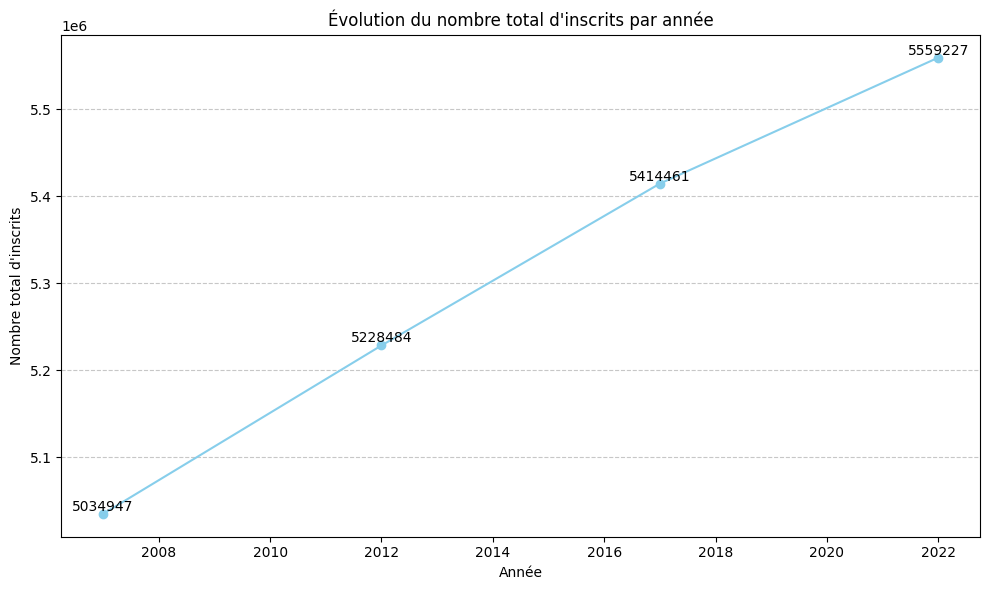

In [175]:
import matplotlib.pyplot as plt

# Groupement des données par année et calcul de la somme des inscrits par année
inscrits_par_annee = data_elections.groupby('Annee')['nombre_inscrits'].sum()

# Création du graphique en ligne
plt.figure(figsize=(10, 6))
plt.plot(inscrits_par_annee.index, inscrits_par_annee.values, marker='o', color='skyblue', linestyle='-')
plt.title('Évolution du nombre total d\'inscrits par année')
plt.xlabel('Année')
plt.ylabel('Nombre total d\'inscrits')

# Ajout de l'annotation pour afficher la somme des inscrits pour chaque année
for x, y in zip(inscrits_par_annee.index, inscrits_par_annee.values):
    plt.text(x, y, f'{y}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [82]:
#Chargement des données des partis politiques
data_partis = pd.read_excel('Datasets\parti_politiques.xlsx')
data_partis.head()

,id_parti_politique,abréviation,nom_parti
0,1,PS,Parti Socialiste
1,2,UMP,Union pour un Mouvement Populaire
2,3,LREM,La République En Marche
3,4,FN,Front National
4,5,RN,Rassemblement National


In [83]:
#Chargement des données des candidats
data_candidats = pd.read_excel('Datasets\candidats_elections.xlsx')

In [84]:
data_candidats.head()

,id_candidat,id_election,id_parti_politique,nom,prenom,nombre_voix
0,1,1,2,SARKOZY,Nicolas,185174
1,2,2,2,SARKOZY,Nicolas,102426
2,3,3,2,SARKOZY,Nicolas,100414
3,4,4,2,SARKOZY,Nicolas,56981
4,5,5,2,SARKOZY,Nicolas,152482


In [85]:
data_chomage = pd.read_excel('Datasets\donnees_chomage_elections.xlsx') 

In [189]:
data_chomage.head(20)

,id_chomage,id_election,pourcentage_chomage_T1
0,1,1,5.2
1,2,2,8.2
2,3,3,8.8
3,4,4,5.9
4,5,5,8.9
5,6,6,6.8
6,7,7,5.5
7,8,8,6.9
8,9,9,8.0
9,10,10,7.4


In [87]:
data_population = pd.read_excel('Datasets\donnees_population.xlsx')

In [88]:
data_population.head()

,id_population,id_election,population
0,1,13,619497
1,2,14,343431
2,3,15,320379
3,4,16,147035
4,5,17,494712


In [89]:
data_pauvrete = pd.read_excel('Datasets\donnees_pauvreté_auvergne_rhone_alpes.xlsx')

In [90]:
data_pauvrete.head()

,Code du département,Libellé du département,Taux de pauvreté 2018,Taux de pauvreté 2019,Taux de pauvreté 2020,Taux de pauvreté 2021
0,1,AIN,10.3,10.7,10.5,10.8
1,3,ALLIER,15.5,15.4,15.3,16.2
2,7,ARDECHE,14.4,14.3,14.3,14.9
3,15,CANTAL,13.0,13.0,13.2,14.2
4,26,DROME,14.8,14.6,14.4,14.8


=> Description et analyse des données

In [91]:
# Dimensions des données des elections
shape = data_elections.shape
print(f"Nombre total d'instances : {shape[0]}")
print(f"Nombre total d'attributs : {shape[1]}")

# Types et codage des attributs
data_elections.info()

# Statistiques descriptives
data_elections.describe()

Nombre total d'instances : 48
Nombre total d'attributs : 8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id_election              48 non-null     int64 
 1   Code                     48 non-null     int64 
 2   Libellé du département   48 non-null     object
 3   Annee                    48 non-null     int64 
 4   nombre_inscrits          48 non-null     int64 
 5   nombre_abstentions       48 non-null     int64 
 6   nombre_blancs_nuls       48 non-null     int64 
 7   votants                  48 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 3.1+ KB


,id_election,Code,Annee,nombre_inscrits,nombre_abstentions,nombre_blancs_nuls,votants
count,48.00,48.000000,48.000000,4.800000e+01,48.000000,48.000000,48.000000
mean,24.50,37.833333,2014.500000,4.424400e+05,90685.395833,22695.354167,351754.583333
std,14.00,26.698740,5.649327,2.778420e+05,66948.526155,13463.598122,216504.450000
min,1.00,1.000000,2007.000000,1.157410e+05,16704.000000,4429.000000,89926.000000
25%,12.75,13.000000,2010.750000,2.525978e+05,44530.500000,13772.750000,201629.750000
50%,24.50,40.000000,2014.500000,3.776155e+05,72453.000000,19656.500000,306253.500000
75%,36.25,64.500000,2018.250000,5.100248e+05,113926.000000,27516.500000,410416.500000
max,48.00,74.000000,2022.000000,1.181791e+06,315218.000000,69066.000000,893838.000000


In [92]:
# Dimensions des données des candidats
shape = data_candidats.shape
print(f"Nombre total d'instances : {shape[0]}")
print(f"Nombre total d'attributs : {shape[1]}")

# Types et codage des attributs
data_candidats.info()

# Statistiques descriptives
data_candidats.describe()

Nombre total d'instances : 96
Nombre total d'attributs : 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id_candidat         96 non-null     int64 
 1   id_election         96 non-null     int64 
 2   id_parti_politique  96 non-null     int64 
 3   nom                 96 non-null     object
 4   prenom              96 non-null     object
 5   nombre_voix         96 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 4.6+ KB


,id_candidat,id_election,id_parti_politique,nombre_voix
count,96.000000,96.000000,96.00000,96.000000
mean,48.500000,24.500000,2.62500,162387.187500
std,27.856777,13.926121,1.32387,111279.069225
min,1.000000,1.000000,1.00000,23938.000000
25%,24.750000,12.750000,1.75000,88360.500000
50%,48.500000,24.500000,2.50000,132818.500000
75%,72.250000,36.250000,3.25000,198210.500000
max,96.000000,48.000000,5.00000,572015.000000


In [93]:
# Dimensions des données des partis politiques
shape = data_partis.shape
print(f"Nombre total d'instances : {shape[0]}")
print(f"Nombre total d'attributs : {shape[1]}")

# Types et codage des attributs
data_partis.info()

# Statistiques descriptives
data_partis.describe()

Nombre total d'instances : 15
Nombre total d'attributs : 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id_parti_politique  15 non-null     int64 
 1   abréviation         15 non-null     object
 2   nom_parti           15 non-null     object
dtypes: int64(1), object(2)
memory usage: 488.0+ bytes


,id_parti_politique
count,15.000000
mean,8.000000
std,4.472136
min,1.000000
25%,4.500000
50%,8.000000
75%,11.500000
max,15.000000


In [94]:
# Dimensions des données de chomage
shape = data_chomage.shape
print(f"Nombre total d'instances : {shape[0]}")
print(f"Nombre total d'attributs : {shape[1]}")

# Types et codage des attributs
data_chomage.info()

# Statistiques descriptives
data_chomage.describe()

Nombre total d'instances : 48
Nombre total d'attributs : 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_chomage              48 non-null     int64  
 1   id_election             48 non-null     int64  
 2   pourcentage_chomage_T1  48 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.2 KB


,id_chomage,id_election,pourcentage_chomage_T1
count,48.00,48.00,48.000000
mean,24.50,24.50,7.470833
std,14.00,14.00,1.485670
min,1.00,1.00,4.000000
25%,12.75,12.75,6.200000
50%,24.50,24.50,7.550000
75%,36.25,36.25,8.425000
max,48.00,48.00,10.400000


In [95]:
# Dimensions des données de la population
shape = data_population.shape
print(f"Nombre total d'instances : {shape[0]}")
print(f"Nombre total d'attributs : {shape[1]}")

# Types et codage des attributs
data_population.info()

# Statistiques descriptives
data_population.describe()

Nombre total d'instances : 36
Nombre total d'attributs : 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   id_population  36 non-null     int64
 1   id_election    36 non-null     int64
 2   population     36 non-null     int64
dtypes: int64(3)
memory usage: 992.0 bytes


,id_population,id_election,population
count,36.000000,36.000000,3.600000e+01
mean,18.500000,30.500000,6.597126e+05
std,10.535654,10.535654,4.635796e+05
min,1.000000,13.000000,1.442260e+05
25%,9.750000,21.750000,3.340078e+05
50%,18.500000,30.500000,5.694775e+05
75%,27.250000,39.250000,7.691910e+05
max,36.000000,48.000000,1.893692e+06


In [96]:
# Dimensions des données de la pauvreté
shape = data_pauvrete.shape
print(f"Nombre total d'instances : {shape[0]}")
print(f"Nombre total d'attributs : {shape[1]}")

# Types et codage des attributs
data_pauvrete.info()

# Statistiques descriptives
data_pauvrete.describe()

Nombre total d'instances : 12
Nombre total d'attributs : 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code du département     12 non-null     int64  
 1   Libellé du département  12 non-null     object 
 2   Taux de pauvreté 2018   12 non-null     float64
 3   Taux de pauvreté 2019   12 non-null     float64
 4   Taux de pauvreté 2020   12 non-null     float64
 5   Taux de pauvreté 2021   12 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 704.0+ bytes


,Code du département,Taux de pauvreté 2018,Taux de pauvreté 2019,Taux de pauvreté 2020,Taux de pauvreté 2021
count,12.000000,12.000000,12.000000,12.000000,12.00000
mean,37.833333,12.725000,12.775000,12.741667,13.35000
std,27.593917,2.191357,2.031177,2.000663,2.15765
min,1.000000,8.900000,9.400000,9.400000,9.50000
25%,13.000000,11.050000,11.300000,11.100000,11.65000
50%,40.000000,13.100000,13.050000,13.200000,14.05000
75%,64.500000,14.500000,14.375000,14.325000,14.82500
max,74.000000,15.500000,15.400000,15.300000,16.20000


In [97]:
# Fusionner les DataFrames "donnees_elections" et "candidats_elections" sur la colonne "id_election"
donnees_completes = pd.merge(data_elections, data_candidats, on='id_election')

# Afficher les premières lignes du DataFrame fusionné pour vérification
donnees_completes.head()

,id_election,Code,Libellé du département,Annee,nombre_inscrits,nombre_abstentions,nombre_blancs_nuls,votants,id_candidat,id_parti_politique,nom,prenom,nombre_voix
0,1,1,AIN,2007,372951,53428,13670,319523,1,2,SARKOZY,Nicolas,185174
1,1,1,AIN,2007,372951,53428,13670,319523,13,1,ROYAL,Ségolène,120679
2,2,3,ALLIER,2007,259503,38826,10809,220677,2,2,SARKOZY,Nicolas,102426
3,2,3,ALLIER,2007,259503,38826,10809,220677,14,1,ROYAL,Ségolène,107442
4,3,7,ARDECHE,2007,235544,31610,9399,203934,3,2,SARKOZY,Nicolas,100414


In [98]:
# Fusionner les DataFrames "donnees_elections" et "candidats_elections" sur la colonne "id_election"
donnees_completes_partis = pd.merge(donnees_completes , data_partis, on='id_parti_politique')

# Afficher les premières lignes du DataFrame fusionné pour vérification
donnees_completes_partis.head()


,id_election,Code,Libellé du département,Annee,nombre_inscrits,nombre_abstentions,nombre_blancs_nuls,votants,id_candidat,id_parti_politique,nom,prenom,nombre_voix,abréviation,nom_parti
0,1,1,AIN,2007,372951,53428,13670,319523,1,2,SARKOZY,Nicolas,185174,UMP,Union pour un Mouvement Populaire
1,2,3,ALLIER,2007,259503,38826,10809,220677,2,2,SARKOZY,Nicolas,102426,UMP,Union pour un Mouvement Populaire
2,3,7,ARDECHE,2007,235544,31610,9399,203934,3,2,SARKOZY,Nicolas,100414,UMP,Union pour un Mouvement Populaire
3,4,15,CANTAL,2007,123322,16704,4429,106618,4,2,SARKOZY,Nicolas,56981,UMP,Union pour un Mouvement Populaire
4,5,26,DROME,2007,338120,47344,12910,290776,5,2,SARKOZY,Nicolas,152482,UMP,Union pour un Mouvement Populaire


In [99]:
#donnees_chomage_elections
# Fusionner les DataFrames "donnees_elections" et "candidats_elections" sur la colonne "id_election"
donnees_completes_finales = pd.merge(donnees_completes_partis , data_chomage, on='id_election')

# Afficher les premières lignes du DataFrame fusionné pour vérification
donnees_completes_finales.head()

,id_election,Code,Libellé du département,Annee,nombre_inscrits,nombre_abstentions,nombre_blancs_nuls,votants,id_candidat,id_parti_politique,nom,prenom,nombre_voix,abréviation,nom_parti,id_chomage,pourcentage_chomage_T1
0,1,1,AIN,2007,372951,53428,13670,319523,1,2,SARKOZY,Nicolas,185174,UMP,Union pour un Mouvement Populaire,1,5.2
1,1,1,AIN,2007,372951,53428,13670,319523,13,1,ROYAL,Ségolène,120679,PS,Parti Socialiste,1,5.2
2,2,3,ALLIER,2007,259503,38826,10809,220677,2,2,SARKOZY,Nicolas,102426,UMP,Union pour un Mouvement Populaire,2,8.2
3,2,3,ALLIER,2007,259503,38826,10809,220677,14,1,ROYAL,Ségolène,107442,PS,Parti Socialiste,2,8.2
4,3,7,ARDECHE,2007,235544,31610,9399,203934,3,2,SARKOZY,Nicolas,100414,UMP,Union pour un Mouvement Populaire,3,8.8


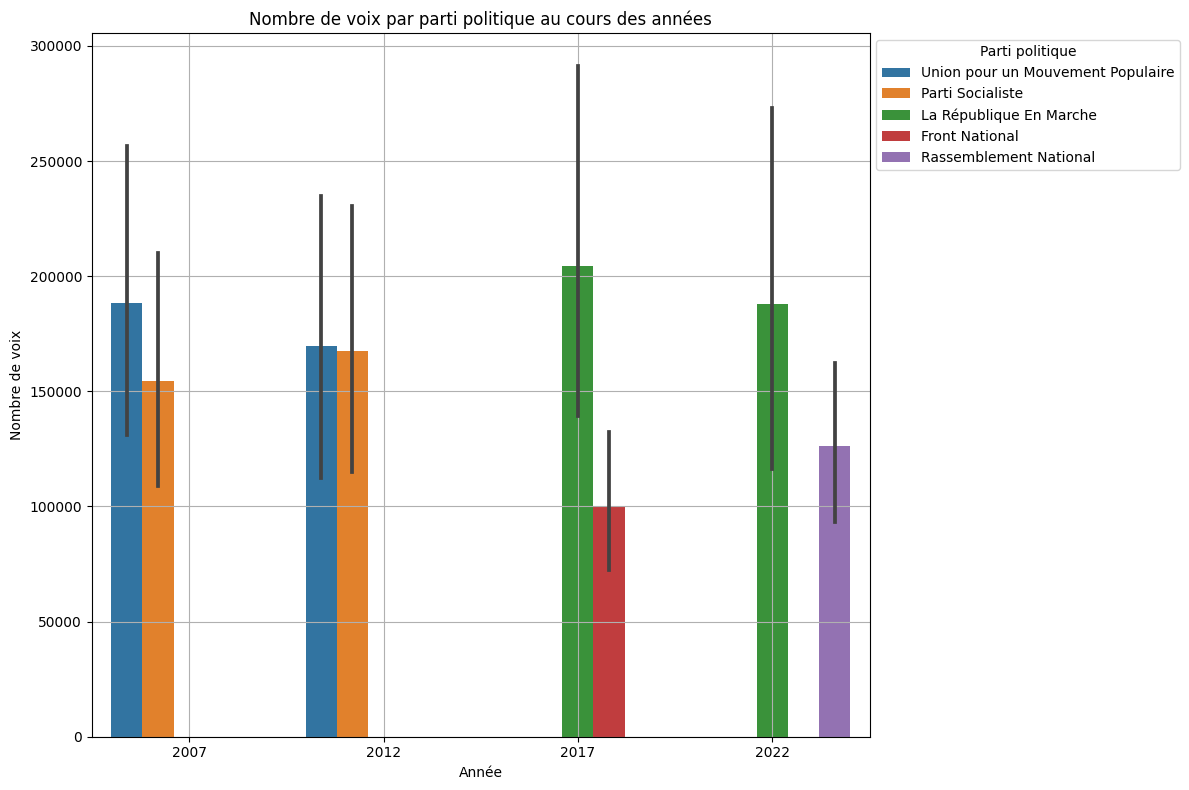

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création du graphique
plt.figure(figsize=(12, 8))

# Utilisation de Seaborn pour une meilleure apparence
sns.barplot(data=donnees_completes_partis, x='Annee', y='nombre_voix', hue='nom_parti')

# Titre et labels
plt.title('Nombre de voix par parti politique au cours des années')
plt.xlabel('Année')
plt.ylabel('Nombre de voix')
plt.legend(title='Parti politique', loc='upper left', bbox_to_anchor=(1, 1))

# Afficher le graphique
plt.grid(True)
plt.tight_layout()
plt.show()


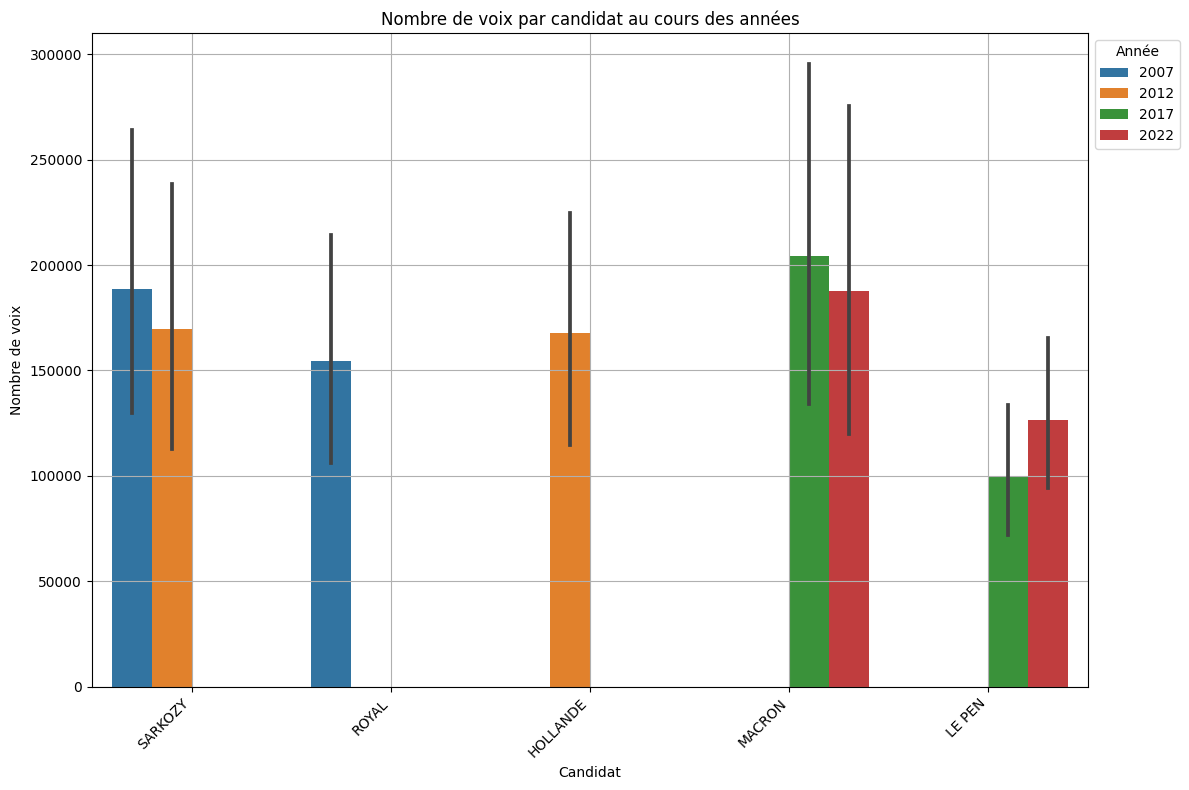

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création du graphique
plt.figure(figsize=(12, 8))

# Utilisation de Seaborn pour une meilleure apparence
sns.barplot(data=donnees_completes_partis, x='nom', y='nombre_voix', hue='Annee')

# Titre et labels
plt.title('Nombre de voix par candidat au cours des années')
plt.xlabel('Candidat')
plt.ylabel('Nombre de voix')
plt.legend(title='Année', loc='upper left', bbox_to_anchor=(1, 1))

# Afficher le graphique
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [137]:

#donnees_chomage_elections
# Fusionner les DataFrames "donnees_elections" et "candidats_elections" sur la colonne "id_election"
donnees_completes_finales = pd.merge(donnees_completes_finales, data_population, on='id_election')

# Afficher les premières lignes du DataFrame fusionné pour vérification
donnees_completes_finales.head(20)

,id_election,Code,Libellé du département,Annee,nombre_inscrits,nombre_abstentions,nombre_blancs_nuls,votants,id_candidat,id_parti_politique,...,prenom,nombre_voix,abréviation,nom_parti,id_chomage,pourcentage_chomage_T1,id_population_x,population_x,id_population_y,population_y
0,13,1,AIN,2012,393866,67279,19513,326587,37,2,...,Nicolas,175741,UMP,Union pour un Mouvement Populaire,13,6.6,1,619497,1,619497
1,13,1,AIN,2012,393866,67279,19513,326587,25,1,...,François,131333,PS,Parti Socialiste,13,6.6,1,619497,1,619497
2,14,3,ALLIER,2012,256211,45079,14924,211132,38,2,...,Nicolas,84593,UMP,Union pour un Mouvement Populaire,14,9.5,2,343431,2,343431
3,14,3,ALLIER,2012,256211,45079,14924,211132,26,1,...,François,111615,PS,Parti Socialiste,14,9.5,2,343431,2,343431
4,15,7,ARDECHE,2012,243351,39421,13975,203930,39,2,...,Nicolas,88429,UMP,Union pour un Mouvement Populaire,15,9.6,3,320379,3,320379
5,15,7,ARDECHE,2012,243351,39421,13975,203930,27,1,...,François,101526,PS,Parti Socialiste,15,9.6,3,320379,3,320379
6,16,15,CANTAL,2012,120931,19078,6213,101853,40,2,...,Nicolas,46097,UMP,Union pour un Mouvement Populaire,16,6.2,4,147035,4,147035
7,16,15,CANTAL,2012,120931,19078,6213,101853,28,1,...,François,49543,PS,Parti Socialiste,16,6.2,4,147035,4,147035
8,17,26,DROME,2012,353114,60130,18589,292984,41,2,...,Nicolas,139436,UMP,Union pour un Mouvement Populaire,17,9.9,5,494712,5,494712
9,17,26,DROME,2012,353114,60130,18589,292984,29,1,...,François,134959,PS,Parti Socialiste,17,9.9,5,494712,5,494712


In [116]:
# Chemin du fichier de sortie CSV
chemin_fichier_csv = 'Datasets/donnees_completes_finales.csv'

# Enregistrer les données dans un fichier CSV
donnees_completes_finales.to_csv(chemin_fichier_csv, index=False)

# Afficher un message pour confirmer l'enregistrement
print(f"Données enregistrées avec succès dans : {chemin_fichier_csv}")

Données enregistrées avec succès dans : Datasets/donnees_completes_finales.csv


In [117]:
donnees_completes_finales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 71
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_election              72 non-null     int64  
 1   Code                     72 non-null     int64  
 2   Libellé du département   72 non-null     object 
 3   Annee                    72 non-null     int64  
 4   nombre_inscrits          72 non-null     int64  
 5   nombre_abstentions       72 non-null     int64  
 6   nombre_blancs_nuls       72 non-null     int64  
 7   votants                  72 non-null     int64  
 8   id_candidat              72 non-null     int64  
 9   id_parti_politique       72 non-null     int64  
 10  nom                      72 non-null     object 
 11  prenom                   72 non-null     object 
 12  nombre_voix              72 non-null     int64  
 13  abréviation              72 non-null     object 
 14  nom_parti                72 

Recherchons ensuite les valeurs manquantes dans chaque colonne.

In [118]:
donnees_completes_finales.isna().sum()

id_election                0
Code                       0
Libellé du département     0
Annee                      0
nombre_inscrits            0
nombre_abstentions         0
nombre_blancs_nuls         0
votants                    0
id_candidat                0
id_parti_politique         0
nom                        0
prenom                     0
nombre_voix                0
abréviation                0
nom_parti                  0
id_chomage                 0
pourcentage_chomage_T1     0
id_population              0
population                 0
dtype: int64

=> Visualisation des données

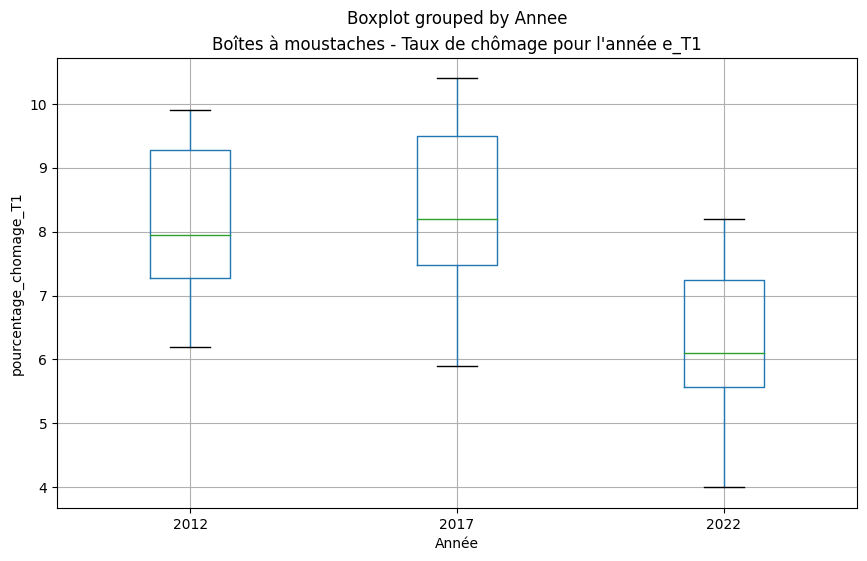

In [119]:
# Chargement des données
donnees_completes_finales = pd.read_csv('Datasets/donnees_completes_finales.csv')

# Sélectionner les colonnes contenant "pourcentage_chomage_T1" pour chaque année
colonnes_chomage = donnees_completes_finales.filter(like='pourcentage_chomage_T1').columns

# Tracer les boîtes à moustaches pour les données "Taux de pauvreté" pour chaque année
for colonne in colonnes_chomage:
    donnees_completes_finales.boxplot(column=colonne, by='Annee', figsize=(10, 6))
    plt.title(f"Boîtes à moustaches - Taux de chômage pour l'année {colonne[-4:]}")
    plt.xlabel("Année")
    plt.ylabel("pourcentage_chomage_T1")
    plt.show()



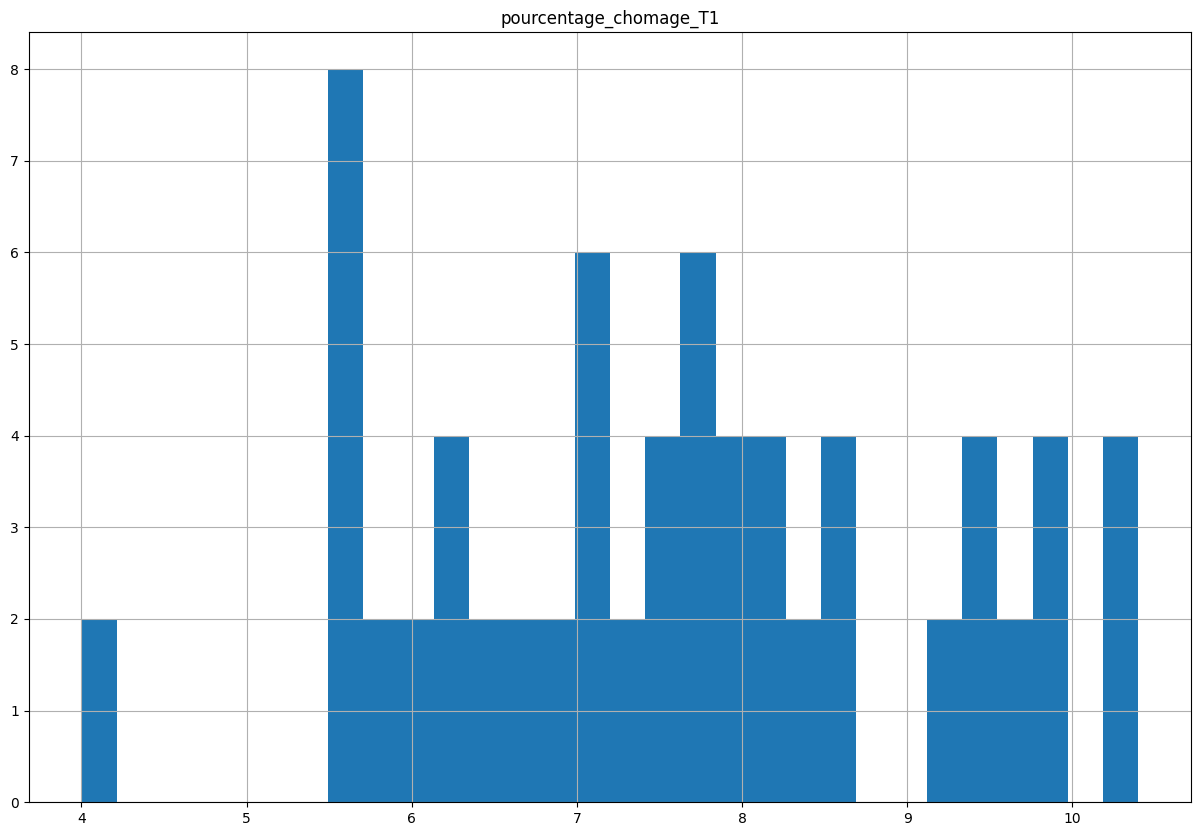

In [120]:
# Histogrammes
donnees_completes_finales[colonnes_chomage].hist(bins=30, figsize=(15,10))
plt.show()

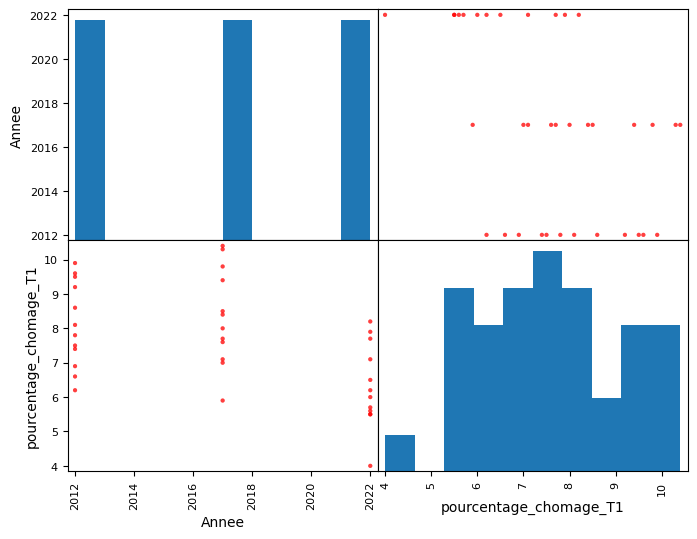

In [121]:

# Sélectionner les colonnes liées au chômage
colonnes_chomage = donnees_completes_finales.filter(like='pourcentage_chomage_T1').columns

# Parcourir les colonnes de chômage et créer une matrice de dispersion pour chaque année
for colonne in colonnes_chomage:
    # Sélectionner les données pour l'année spécifique
    donnees_annee = donnees_completes_finales[["Annee", colonne]]
    
    # Tracer la matrice de dispersion pour l'année spécifique
    scatter_matrix(donnees_annee, figsize=(8, 6), color='red')
   
    plt.xlabel("pourcentage_chomage_T1")
    plt.ylabel("pourcentage_chomage_T1")
    plt.show()


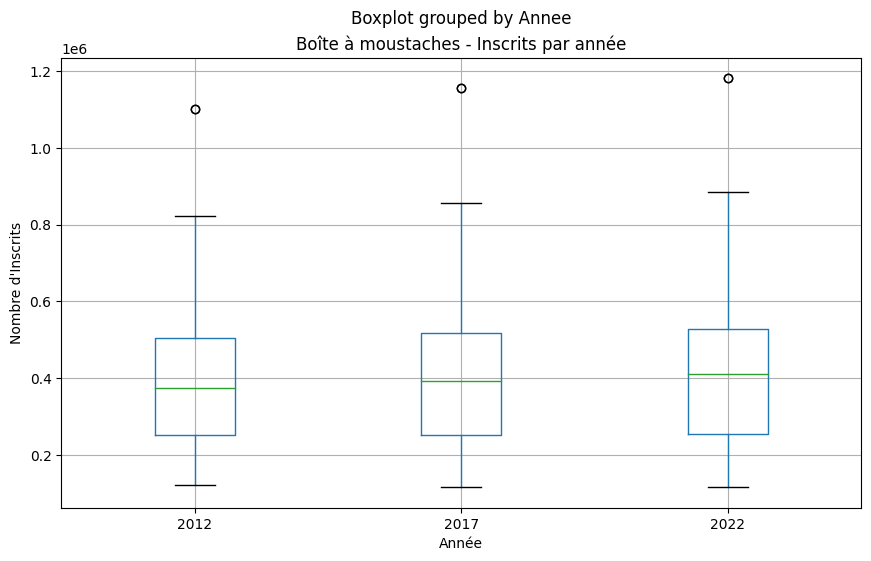

In [122]:

# Sélectionner les colonnes contenant "Inscrits" pour chaque année
colonnes_inscrits = donnees_completes_finales.filter(like='nombre_inscrits').columns

# Parcourir les colonnes d'inscrits et créer une boîte à moustaches pour chaque année
for colonne in colonnes_inscrits:
    # Sélectionner les données pour l'année spécifique
    donnees_annee = donnees_completes_finales[["Annee", colonne]]
    
    # Tracer la boîte à moustaches pour l'année spécifique
    donnees_annee.boxplot(column=colonne, by='Annee', figsize=(10, 6))
    plt.title("Boîte à moustaches - Inscrits par année")
    plt.xlabel("Année")
    plt.ylabel("Nombre d'Inscrits")
    plt.show()


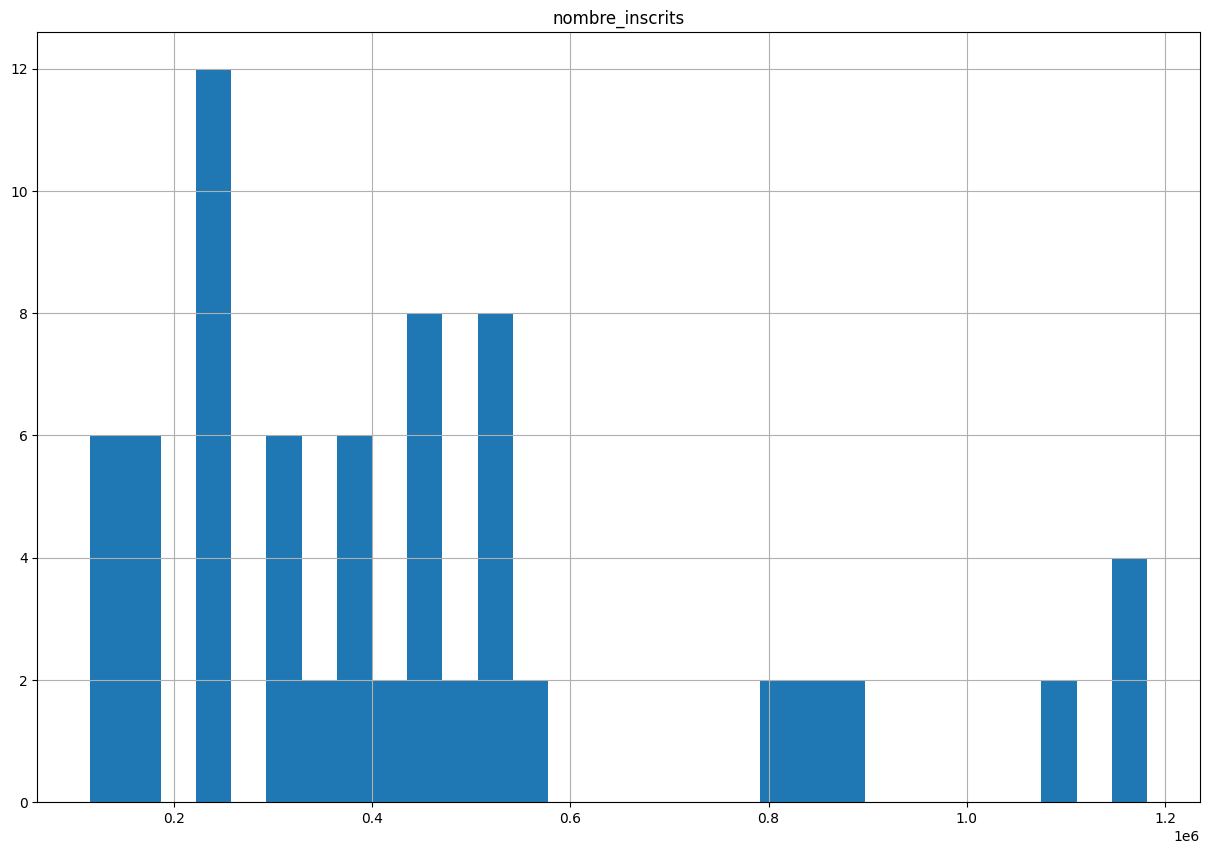

In [123]:
# Histogrammes
donnees_completes_finales[colonnes_inscrits].hist(bins=30, figsize=(15,10))
plt.show()

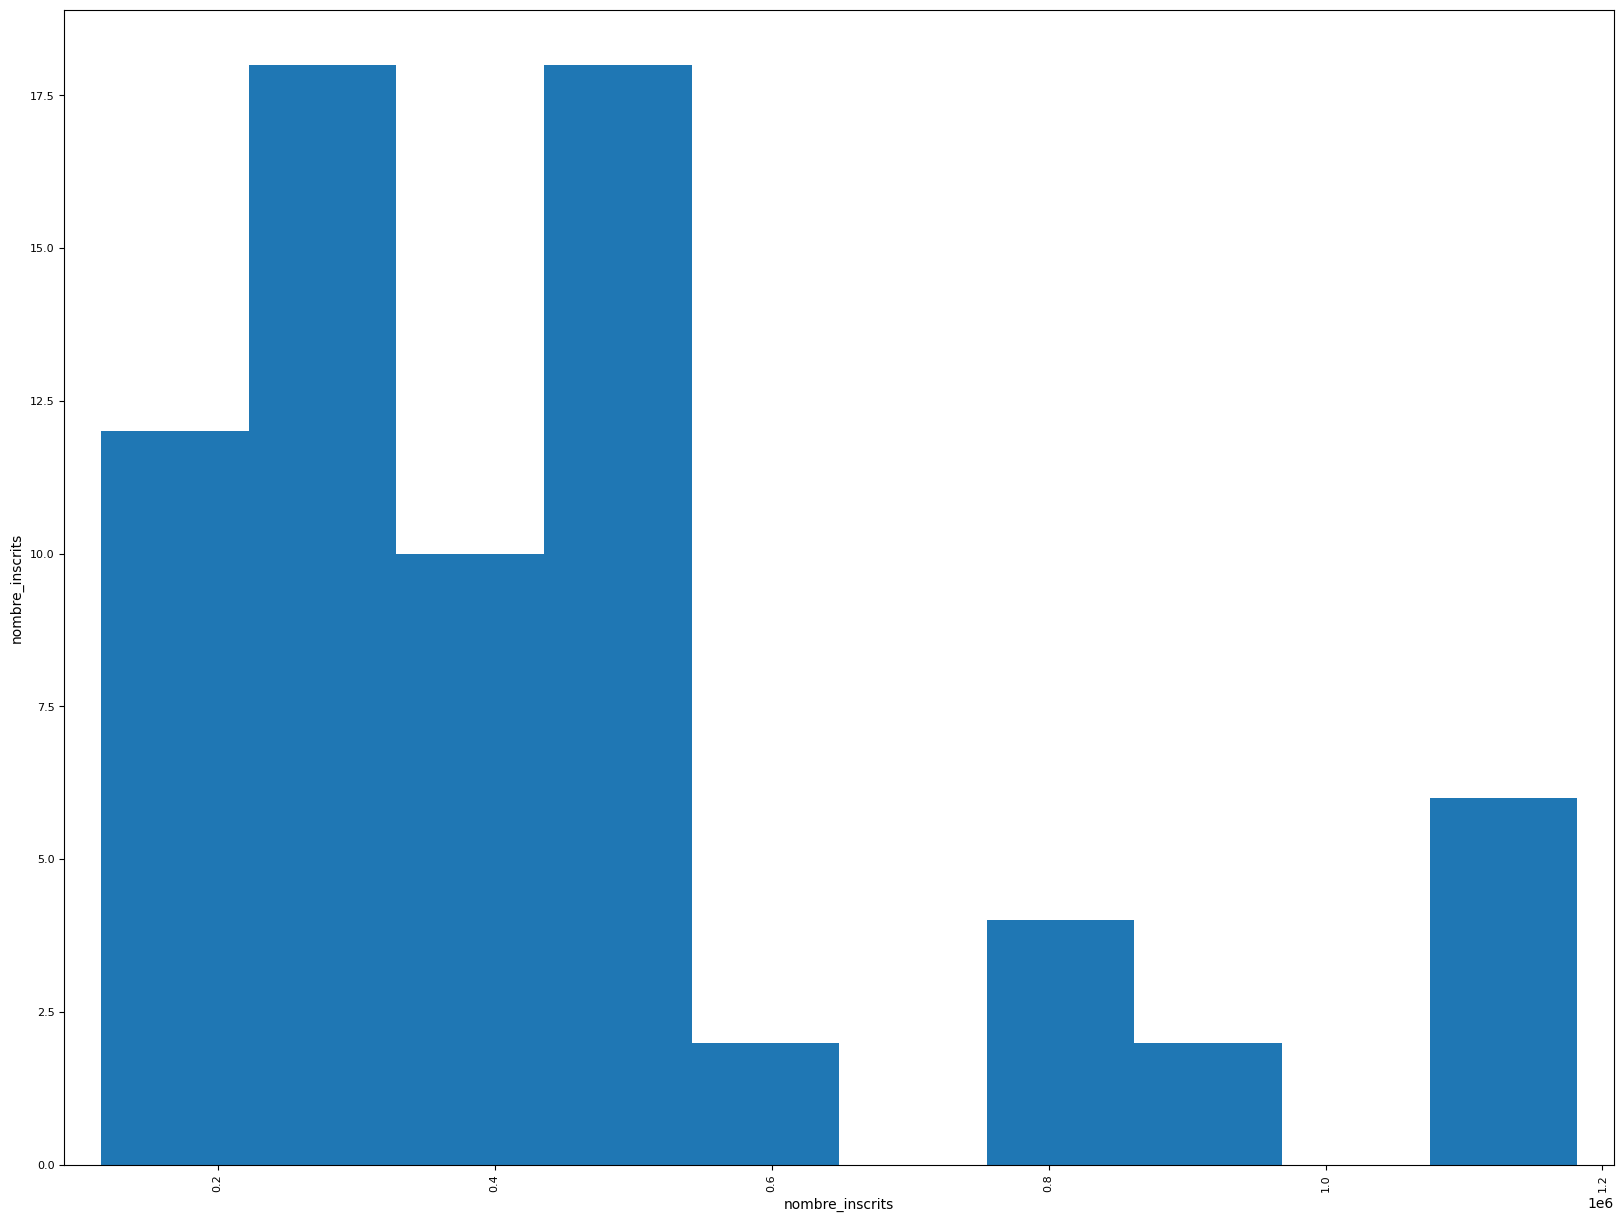

In [124]:
# Scatter plot
scatter_matrix(donnees_completes_finales[colonnes_inscrits], figsize=(20, 15), color='red')
plt.show()

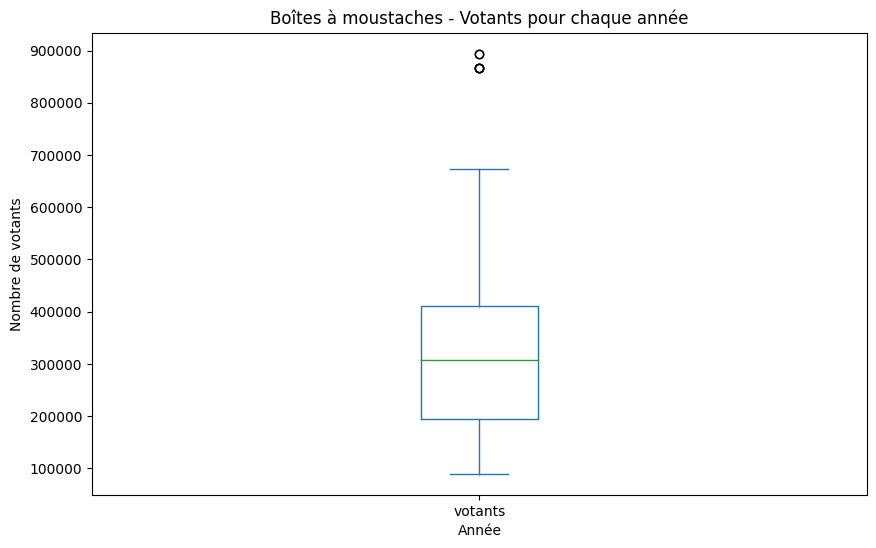

In [125]:
# Sélectionner les colonnes contenant "votants" pour chaque année
colonnes_votants = donnees_completes_finales.filter(like='votants').columns

# Tracer les boîtes à moustaches pour les données "Inscrits" pour chaque année
donnees_completes_finales[colonnes_votants].plot(kind='box', figsize=(10, 6))
plt.title("Boîtes à moustaches - Votants pour chaque année")
plt.xlabel("Année")
plt.ylabel("Nombre de votants")
plt.show()


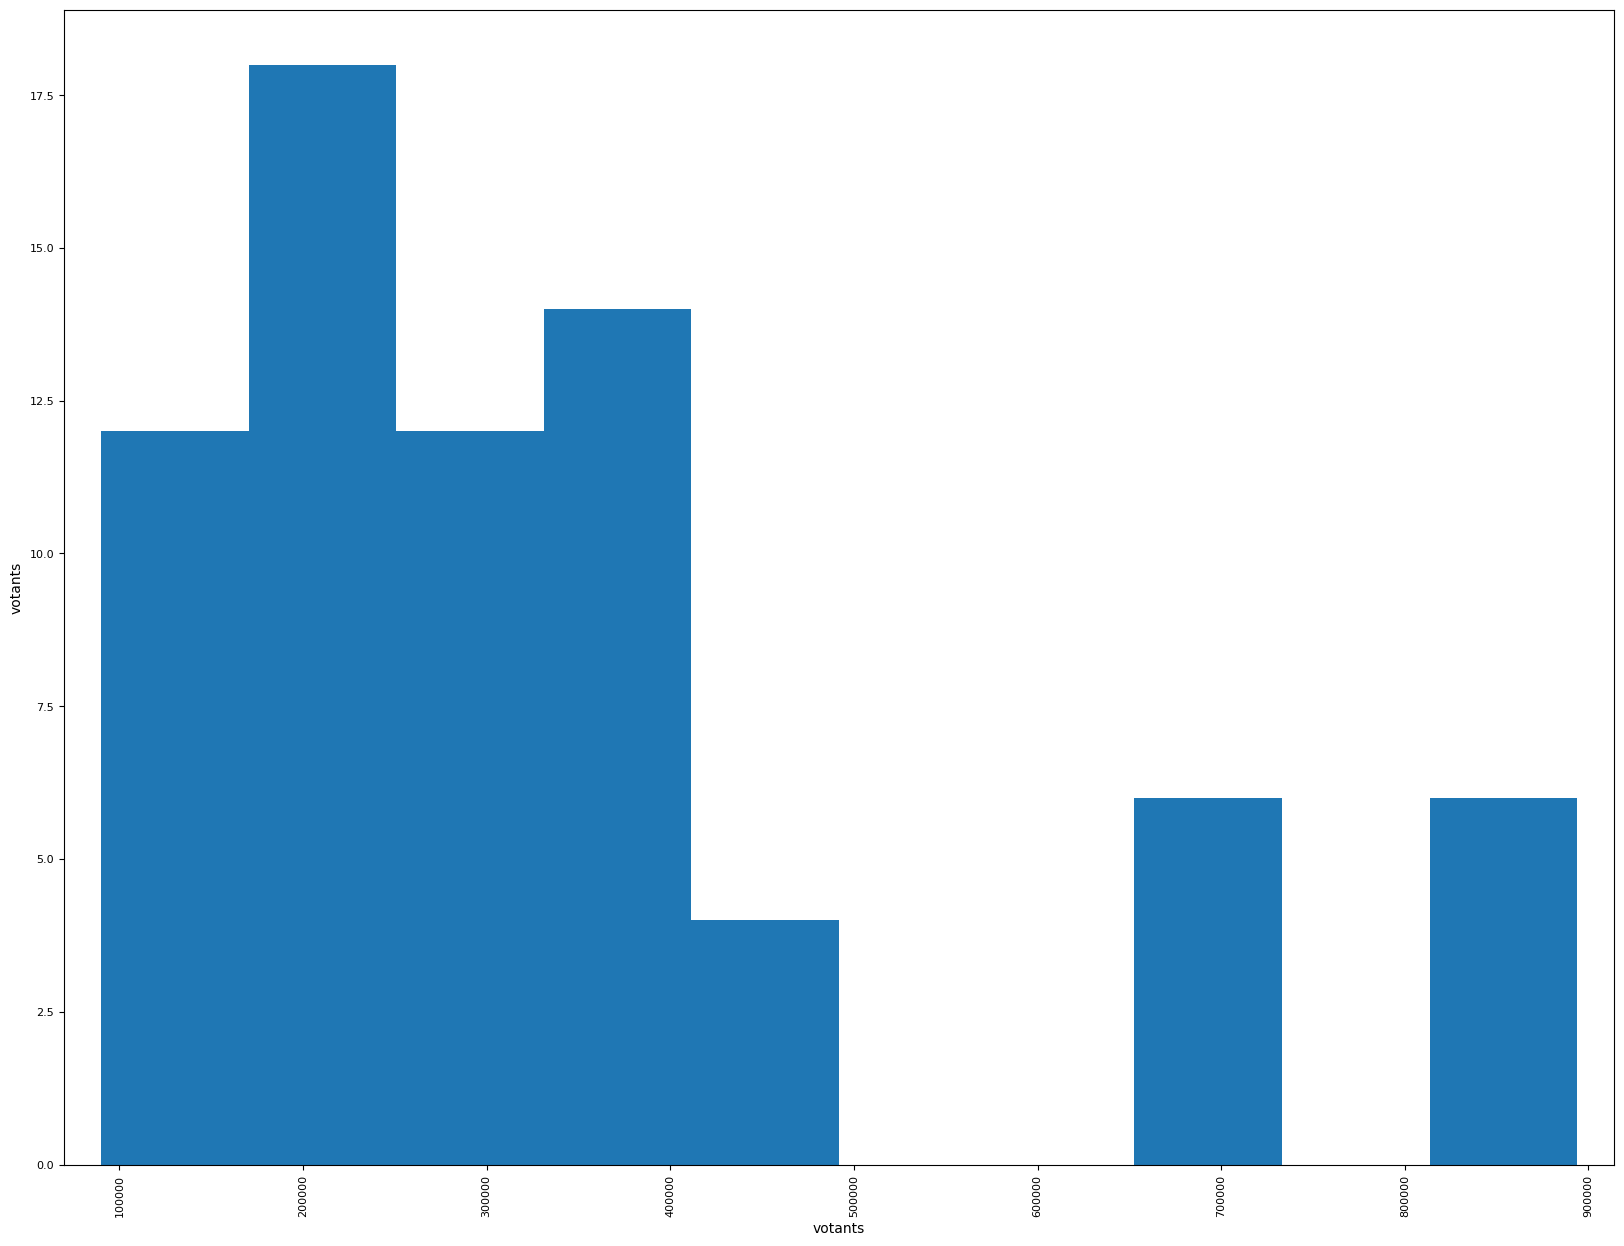

In [126]:
# Scatter plot
scatter_matrix(donnees_completes_finales[colonnes_votants], figsize=(20, 15), color='red')
plt.show()

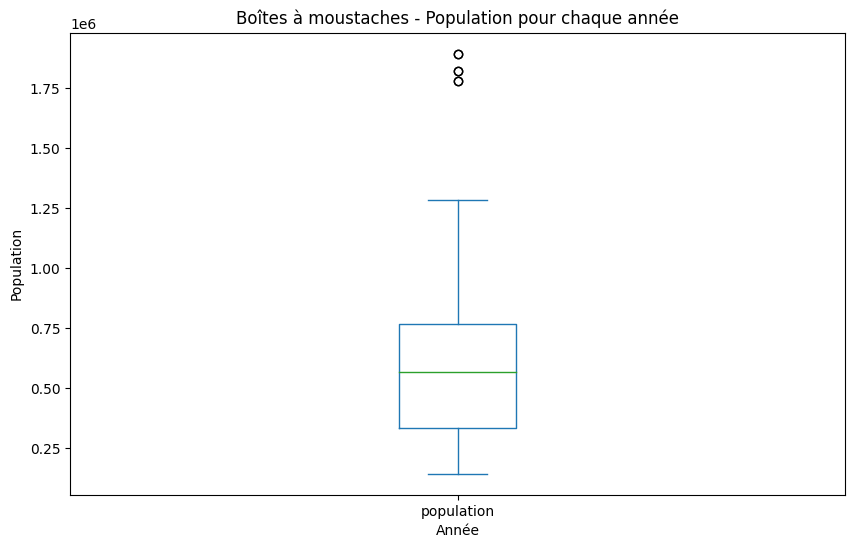

In [129]:
# Sélectionner la colonne "population"
colonne_population = ['population']

# Tracer les boîtes à moustaches pour les données "population" pour chaque année
donnees_completes_finales[colonne_population].plot(kind='box', figsize=(10, 6))
plt.title("Boîtes à moustaches - Population pour chaque année")
plt.xlabel("Année")
plt.ylabel("Population")
plt.show()


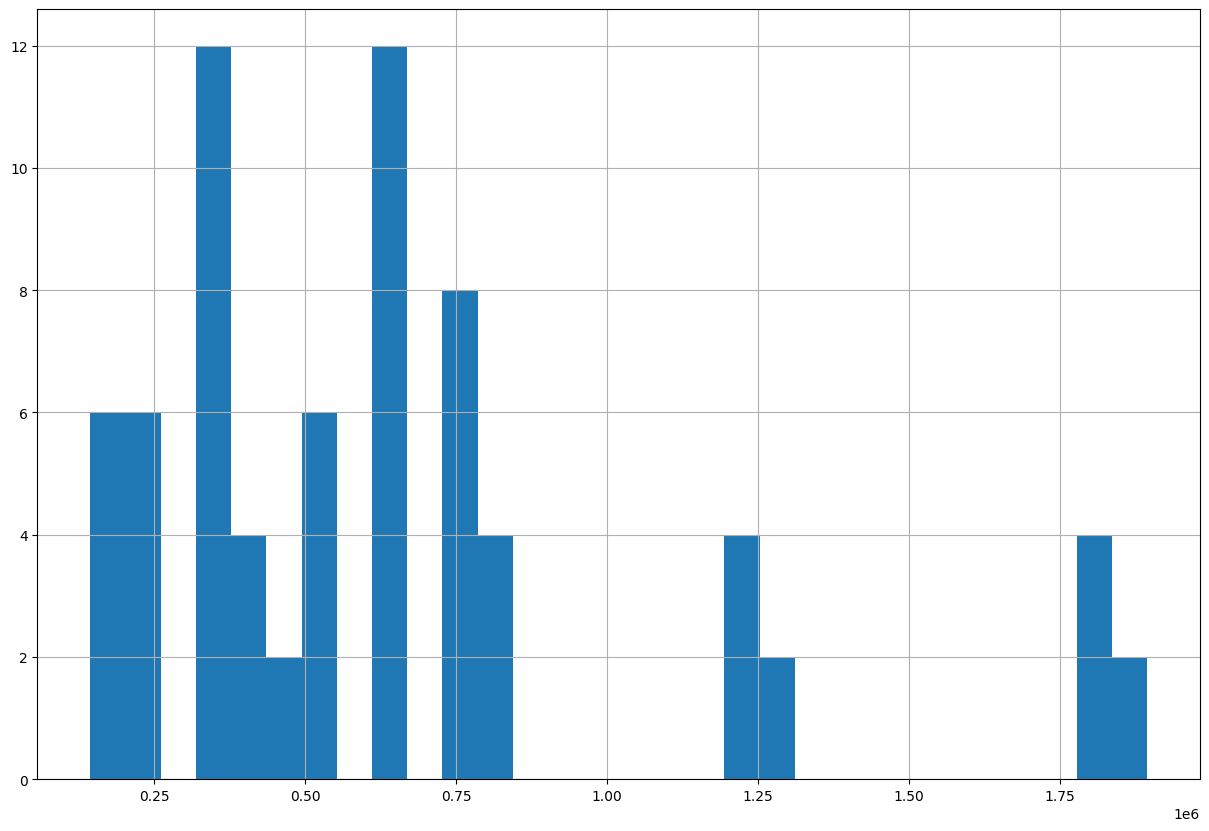

In [132]:
# Histogrammes
donnees_completes_finales['population'].hist(bins=30, figsize=(15,10))
plt.show()


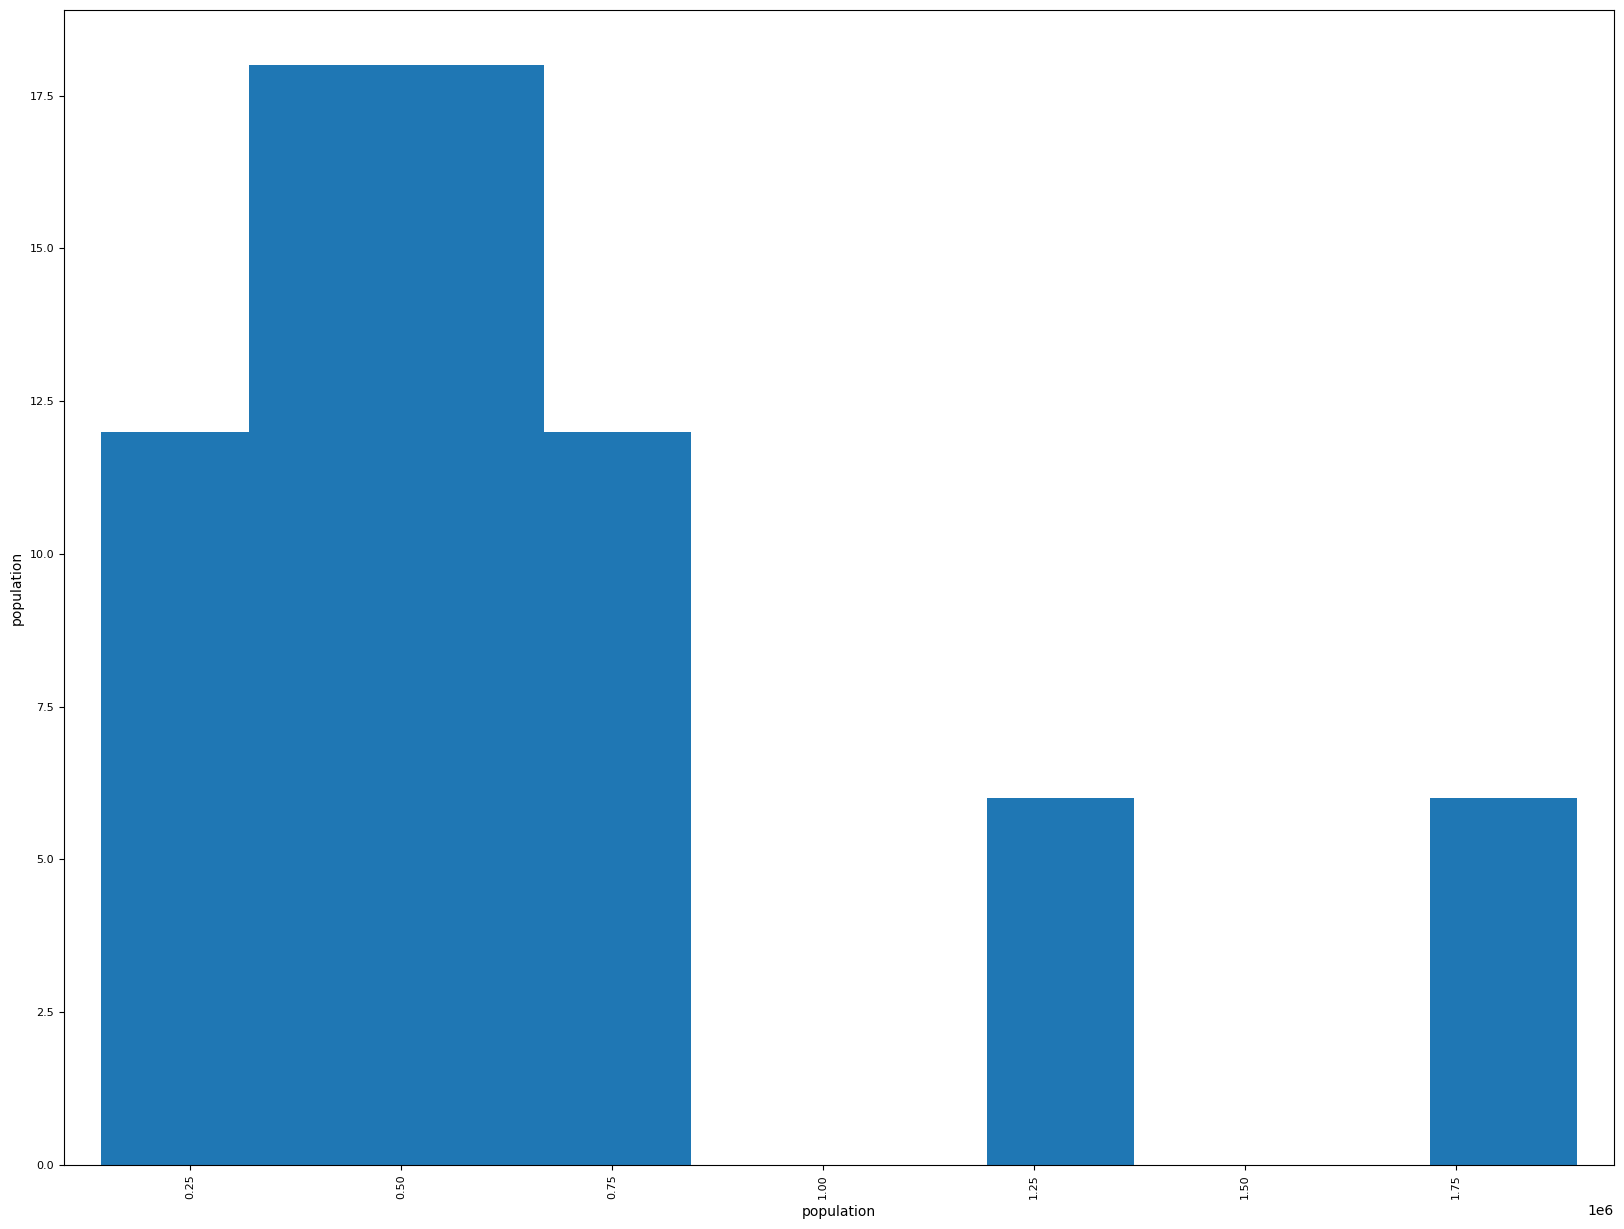

In [135]:
# Importer la fonction scatter_matrix
from pandas.plotting import scatter_matrix

# Scatter plot
scatter_matrix(donnees_completes_finales[colonne_population], figsize=(20, 15), color='red')
plt.show()


In [138]:
# Utiliser groupby pour regrouper les données par année et calculer la somme des inscrits
somme_inscrits_par_annee = donnees_completes_partis.groupby('Annee')['nombre_inscrits'].sum().reset_index()

# Afficher le DataFrame résultant
print(somme_inscrits_par_annee)


   Annee  nombre_inscrits
0   2007         10069894
1   2012         10456968
2   2017         10828922
3   2022         11118454


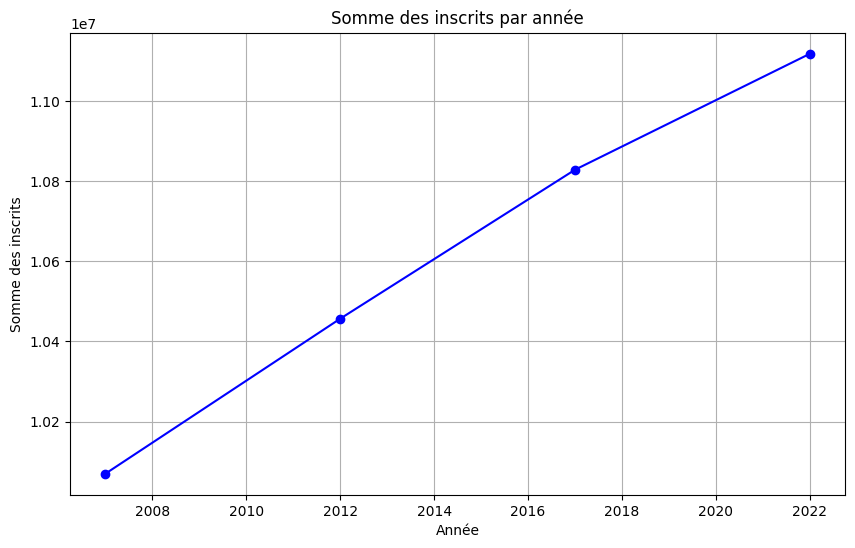

In [140]:


# Utiliser groupby pour regrouper les données par année et calculer la somme des inscrits
somme_inscrits_par_annee = donnees_completes_partis.groupby('Annee')['nombre_inscrits'].sum().reset_index()

# Créer un graphe en ligne
plt.figure(figsize=(10, 6))
plt.plot(somme_inscrits_par_annee['Annee'], somme_inscrits_par_annee['nombre_inscrits'], marker='o', color='blue', linestyle='-')

# Ajouter des étiquettes et un titre
plt.xlabel('Année')
plt.ylabel('Somme des inscrits')
plt.title('Somme des inscrits par année')

# Afficher la grille
plt.grid(True)

# Afficher le graphe
plt.show()


In [143]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Séparation des données en features (X) et target (y)
X = donnees_completes_finales[['Annee']]
y = donnees_completes_finales['nombre_inscrits']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation du modèle de régression
model = RandomForestRegressor()

# Entraînement du modèle
model.fit(X_train, y_train)

# Prédiction pour les années 2025, 2026 et 2027
annees_a_predire = [[2025], [2026], [2027]]
predictions = model.predict(annees_a_predire)

# Affichage des prédictions
for annee, prediction in zip(annees_a_predire, predictions):
    print(f"Prédiction pour l'année {annee[0]} : {prediction}")


Prédiction pour l'année 2025 : 459385.9612641849
Prédiction pour l'année 2026 : 459385.9612641849
Prédiction pour l'année 2027 : 459385.9612641849


C:\Users\KAOUTAR\miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [147]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Sélectionner les données pour les années 2007, 2012, 2017 et 2022
donnees_annees = donnees_completes_finales[donnees_completes_finales['Annee'].isin([ 2012, 2017, 2022])]

# Agréger les données pour obtenir le nombre total d'inscrits par "Libellé du département" pour chaque année
donnees_agregees = donnees_annees.groupby(['Code', 'Annee'])['nombre_inscrits'].sum().reset_index()

# Séparer les features (années) et la cible (nombre d'inscrits)
X = donnees_agregees[['Annee']]
y = donnees_agregees['nombre_inscrits']

# Entraîner un modèle de régression linéaire
model = LinearRegression()
model.fit(X, y)

# Prédire le nombre d'inscrits pour les années suivantes (2025, 2026, 2027)
annees_suivantes = [2025, 2026, 2027]
predictions = model.predict(pd.DataFrame(annees_suivantes, columns=['Annee']))

# Afficher les prédictions
for annee, prediction in zip(annees_suivantes, predictions):
    print(f"Prédiction pour l'année {annee} : {prediction}")


Prédiction pour l'année 2025 : 944219.7333333325
Prédiction pour l'année 2026 : 949732.1166666653
Prédiction pour l'année 2027 : 955244.4999999981


In [148]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Sélectionner les données pour les années 2007, 2012, 2017 et 2022
donnees_annees = donnees_completes_finales[donnees_completes_finales['Annee'].isin([2007, 2012, 2017, 2022])]

# Agréger les données pour obtenir le nombre total d'inscrits par "Libellé du département" pour chaque année
donnees_agregees = donnees_annees.groupby(['Code', 'Annee'])['nombre_inscrits'].sum().reset_index()

# Séparer les features (années) et la cible (nombre d'inscrits)
X = donnees_agregees[['Annee']]
y = donnees_agregees['nombre_inscrits']

# Entraîner un modèle de régression linéaire
model = LinearRegression()
model.fit(X, y)

# Prédire le nombre d'inscrits pour les années suivantes (2025, 2026, 2027) par département
annees_suivantes = [2025, 2026, 2027]
predictions_par_dep = {}

for annee in annees_suivantes:
    predictions = model.predict(pd.DataFrame([annee], columns=['Annee']))
    predictions_par_dep[annee] = predictions

# Afficher les prédictions par département
for departement, predictions in predictions_par_dep.items():
    for annee, prediction in zip(annees_suivantes, predictions):
        print(f"Prédiction pour l'année {annee} - Département {departement} : {prediction}")


Prédiction pour l'année 2025 - Département 2025 : 944219.7333333325
Prédiction pour l'année 2025 - Département 2026 : 949732.1166666653
Prédiction pour l'année 2025 - Département 2027 : 955244.4999999981


In [163]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Chargement des données
donnees_elections = pd.read_csv('Datasets/donnees_completes_finales.csv')

# Sélection des colonnes pertinentes
colonnes_features = ['Annee', 'nombre_inscrits', 'nombre_abstentions', 'nombre_blancs_nuls', 
                     'id_candidat', 'id_parti_politique', 'id_chomage', 'pourcentage_chomage_T1']
colonne_cible = 'nombre_voix'

# Sélection des données de l'année 2022 comme point de départ pour les prédictions 2025
donnees_2022 = donnees_elections[donnees_elections['Annee'] == 2022]

# Sélectionner une seule ligne par code de département
donnees_2022_unique = donnees_2022.drop_duplicates(subset=['Code'])

# Séparation des données en features et target
X = donnees_2022_unique[colonnes_features]
y = donnees_2022_unique[colonne_cible]

# Création et entraînement du modèle
model = RandomForestRegressor()
model.fit(X, y)

# Prédiction pour l'année 2025
predictions_2025 = model.predict(X)

# Ajout des prédictions au DataFrame original pour l'année 2022
donnees_2022_unique['predictions_2025'] = predictions_2025

# Affichage des prédictions par code de département pour 2025
donnees_2025_pred = donnees_2022_unique[['Code', 'predictions_2025']].copy()
print(donnees_2025_pred)
# Prédictions sur les données d'entraînement
predictions_train = model.predict(X)

# Calcul du coefficient de détermination (R^2)
r2 = r2_score(y, predictions_train)
print("Coefficient de détermination (R^2) :", r2)

# Calcul de l'erreur quadratique moyenne (RMSE)
rmse = mean_squared_error(y, predictions_train, squared=False)
print("Erreur quadratique moyenne (RMSE) :", rmse)

# Calcul de l'erreur absolue moyenne (MAE)
mae = mean_absolute_error(y, predictions_train)
print("Erreur absolue moyenne (MAE) :", mae)


    Code  predictions_2025
48     1         162639.40
50     3          90172.62
52     7          96893.90
54    15          60815.97
56    26         145554.57
58    43          67414.24
60    74         218167.81
62    38         358100.47
64    42         198973.61
66    63         190506.94
68    69         473766.47
70    73         137729.04
Coefficient de détermination (R^2) : 0.9693574149483668
Erreur quadratique moyenne (RMSE) : 24037.350372550434
Erreur absolue moyenne (MAE) : 12718.311666666674


C:\Users\KAOUTAR\AppData\Local\Temp\ipykernel_17380\1824030910.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donnees_2022_unique['predictions_2025'] = predictions_2025


In [157]:


# Chargement des données
donnees_elections = pd.read_csv('Datasets/donnees_completes_finales.csv')

# Sélection des colonnes pertinentes
colonnes_features = ['Annee', 'nombre_inscrits', 'nombre_abstentions', 'nombre_blancs_nuls', 
                     'id_candidat', 'id_parti_politique', 'id_chomage', 'pourcentage_chomage_T1']
colonne_cible = 'nombre_voix'

# Sélection des données de l'année 2022 comme point de départ pour les prédictions 2025
donnees_2022 = donnees_elections[donnees_elections['Annee'] == 2022]

# Sélectionner une seule ligne par code de département
donnees_2022_unique = donnees_2022.drop_duplicates(subset=['Code'])

# Séparation des données en features et target
X = donnees_2022_unique[colonnes_features]
y = donnees_2022_unique[colonne_cible]

# Création et entraînement du modèle
model = RandomForestRegressor()
model.fit(X, y)

# Prédiction pour l'année 2025
predictions_2026 = model.predict(X)

# Ajout des prédictions au DataFrame original pour l'année 2022
donnees_2022_unique['predictions_2026'] = predictions_2026

# Affichage des prédictions par code de département pour 2026
donnees_2026_pred = donnees_2022_unique[['Code', 'predictions_2026']].copy()
print(donnees_2026_pred)



    Code  predictions_2026
48     1         165305.63
50     3          85631.66
52     7          94169.74
54    15          62453.07
56    26         148947.89
58    43          67535.76
60    74         217112.43
62    38         365931.93
64    42         197370.66
66    63         188066.69
68    69         474910.72
70    73         160769.15


C:\Users\KAOUTAR\AppData\Local\Temp\ipykernel_17380\2677816697.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donnees_2022_unique['predictions_2026'] = predictions_2026


In [158]:
# Chargement des données
donnees_elections = pd.read_csv('Datasets/donnees_completes_finales.csv')

# Sélection des colonnes pertinentes
colonnes_features = ['Annee', 'nombre_inscrits', 'nombre_abstentions', 'nombre_blancs_nuls', 
                     'id_candidat', 'id_parti_politique', 'id_chomage', 'pourcentage_chomage_T1']
colonne_cible = 'nombre_voix'

# Sélection des données de l'année 2022 comme point de départ pour les prédictions 2025
donnees_2022 = donnees_elections[donnees_elections['Annee'] == 2022]

# Sélectionner une seule ligne par code de département
donnees_2022_unique = donnees_2022.drop_duplicates(subset=['Code'])

# Séparation des données en features et target
X = donnees_2022_unique[colonnes_features]
y = donnees_2022_unique[colonne_cible]

# Création et entraînement du modèle
model = RandomForestRegressor()
model.fit(X, y)

# Prédiction pour l'année 2025
predictions_2027 = model.predict(X)

# Ajout des prédictions au DataFrame original pour l'année 2022
donnees_2022_unique['predictions_2027'] = predictions_2027

# Affichage des prédictions par code de département pour 2027
donnees_2027_pred = donnees_2022_unique[['Code', 'predictions_2027']].copy()
print(donnees_2027_pred)

    Code  predictions_2027
48     1         164366.84
50     3          88976.17
52     7          95155.52
54    15          55144.58
56    26         148586.27
58    43          71666.77
60    74         224131.35
62    38         374215.21
64    42         205588.60
66    63         194580.48
68    69         490733.77
70    73         142355.58


C:\Users\KAOUTAR\AppData\Local\Temp\ipykernel_17380\1791322477.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donnees_2022_unique['predictions_2027'] = predictions_2027
